# Exercises on simulating moving objects

## Exercises 9.1

An asteroid has the velocity vector $ v = (vx, vy) = (-3, 1) $. Which direction is it moving on the screen.

The asteroid will be moving up ($ vy $ is positive) and to the left ($ vx $ is negative).

## Exercises 9.2

Create a function that carries out Euler's method automatically for a constantly accelerating object. You need provide the function with an acceleration vector, initial velocity vector, initial position vector, and perhaps other parameters.

In the concepts section I created a *curried* function as i wanted to create several simulations with the same initial conditions.

I will simplify the solution here and remove currying, and we can validate from the data we used in the concepts section:

In [2]:
from my_vectors import add, scale

def eulers_method(s0, v0, a, total_time, step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time / step_count
    for _ in range(0, step_count):
        s = add(s, scale(dt, v))
        v = add(v, scale(dt, a))
        trajectory.append(s)
    return trajectory

# should be [(0, 0), (2, 0), (4, 0.8), (6, 2.4), (8, 4.8), (10, 8.0)]
trajectory = eulers_method(s0=(0, 0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=5)
print('trajectory={}'.format(trajectory))


trajectory=[(0, 0), (2.0, 0.0), (4.0, 0.8), (6.0, 2.4000000000000004), (8.0, 4.800000000000001), (10.0, 8.0)]


## Exercise 9.3

In the calculation of section 9.4, we underapproximated the y-coordinate of position because we updated the y component of the velocity at the end of each time interval.

Update the velocity at the beginning of each time interval and show that you over approximate the y position over time.

In the implementation of the Euler's method for exercise 9.2, and also in the concepts implementation we do:

```python
def eulers_method(s0, v0, a, total_time, step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time / step_count
    for _ in range(0, step_count):
        s = add(s, scale(dt, v))
        v = add(v, scale(dt, a))  # v is updated for next cycle
        trajectory.append(s)
    return trajectory
```

As you can see, the velocity `v` is updated for the next cycle. What it is requested is that we change the function so that it is updated before `s` so that it is taken under consideration for the current cycle:

In [2]:
from my_vectors import add, scale

def eulers_method_overapprox(s0, v0, a, total_time, step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time / step_count
    for _ in range(0, step_count):
        v = add(v, scale(dt, a))  # v is updated for current cycle
        s = add(s, scale(dt, v))
        trajectory.append(s)
    return trajectory

# should be [(0, 0), (2, 0), (4, 0.8), (6, 2.4), (8, 4.8), (10, 8.0)]
trajectory = eulers_method_overapprox(s0=(0, 0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=5)
print('trajectory={}'.format(trajectory))

trajectory=[(0, 0), (2.0, 0.8), (4.0, 2.4000000000000004), (6.0, 4.800000000000001), (8.0, 8.0), (10.0, 12.0)]


The best way to compare is to plot both of them:

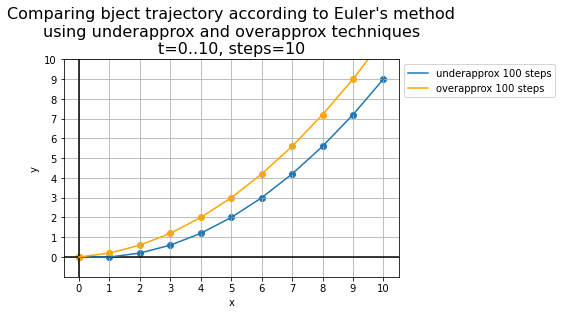

In [8]:
from my_calculus import eulers_method, eulers_method_overapprox
import matplotlib.pyplot as plt


underapprox_100 = eulers_method(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=100)
overapprox_100 = eulers_method_overapprox(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=100)
underapprox_10 = eulers_method(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=10)
overapprox_10 = eulers_method_overapprox(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=10)


fig, ax = plt.subplots()
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

plt.title(
    'Comparing bject trajectory according to Euler\'s method\n'
    'using underapprox and overapprox techniques\n'
    't=0..10, steps=10', fontsize=16)

plt.ylim(-1, 10)
plt.xticks(range(0, 11))
plt.yticks(range(0, 11))

# plotting trajectories as a scatter plots
xs = [x for (x, _) in underapprox_10]
ys = [y for (_, y) in underapprox_10]
plt.scatter(xs, ys, color='C0')
plt.plot(xs, ys, label='underapprox 100 steps', color='C0')

xs = [x for (x, _) in overapprox_10]
ys = [y for (_, y) in overapprox_10]
plt.scatter(xs, ys, color='orange')
plt.plot(xs, ys, label='overapprox 100 steps', color='orange')

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

As you can see, for 10 steps there's some difference, but it will get diluted if we use 100 steps as seen below:

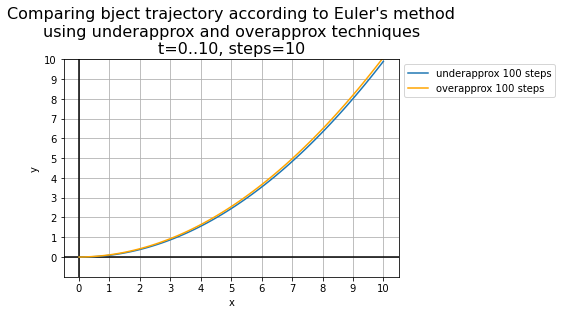

In [11]:
from my_calculus import eulers_method, eulers_method_overapprox
import matplotlib.pyplot as plt


underapprox_100 = eulers_method(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=100)
overapprox_100 = eulers_method_overapprox(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=100)
underapprox_10 = eulers_method(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=10)
overapprox_10 = eulers_method_overapprox(s0=(0,0), v0=(1, 0), a=(0, 0.2), total_time=10, step_count=10)


fig, ax = plt.subplots()
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

plt.title(
    'Comparing object trajectory according to Euler\'s method\n'
    'using underapprox and overapprox techniques\n'
    't=0..10, steps=10', fontsize=16)

plt.ylim(-1, 10)
plt.xticks(range(0, 11))
plt.yticks(range(0, 11))

# plotting trajectories as a scatter plots
xs = [x for (x, _) in underapprox_100]
ys = [y for (_, y) in underapprox_100]
plt.plot(xs, ys, label='underapprox 100 steps', color='C0')

xs = [x for (x, _) in overapprox_100]
ys = [y for (_, y) in overapprox_100]
plt.plot(xs, ys, label='overapprox 100 steps', color='orange')

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Exercise 9.4

Any projectile like a thrown baseball, a bullet, or an airborne snowboarder experiences the same acceleration vector: $ 9.81 \; \frac{\frac{m}{s}}{s} $.
If a baseball is thrown from shoulder height at x = 0, we could say its initial position is $ (0, 1.5) $. Assume it's thrown at an initial speed of $ 30 \; \frac{m}{s} $ at an angle of 20° up from the positive x direction.

Calculate the trajectory using Euler's method. Approximately, how far does the baseball go in the x direction before hitting the ground?

As we already have our implementation of the Euler's method in a library, all the complexity lies in getting the correct initial data to be able to invoke the function.

The signature of the function is:

```python
trajectory_xy = eulers_method(s0=(x0,y0), v0=(vx0, vy0), a=(ax, ay), total_time=duration, step_count=num_iterations)
```

Therefore, for our baseball case:
```python
s0=(0, 1.5)
v0=to_cartesian(30, to_radians(20))
a0=(0, -9.81)
```

Thus:

In [8]:
from my_calculus import eulers_method
from my_vectors import to_cartesian, to_radians

trajectory = eulers_method(s0=(0, 1.5), v0=(to_cartesian((30, to_radians(20)))), a=(0, -9.81), total_time=3, step_count=10)

print('trajectory={}'.format(trajectory))


trajectory=[(0, 1.5), (8.457233587073175, 4.578181289931019), (16.91446717414635, 6.773462579862038), (25.371700761219522, 8.085843869793056), (33.8289343482927, 8.515325159724075), (42.286167935365874, 8.061906449655094), (50.74340152243905, 6.725587739586112), (59.20063510951223, 4.506369029517131), (67.6578686965854, 1.4042503194481504), (76.11510228365857, -2.5807683906208303), (84.57233587073175, -7.448687100689812)]


Now, let's plot it:

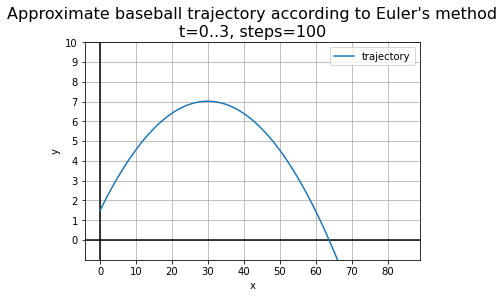

In [38]:
from my_calculus import eulers_method
from my_vectors import to_cartesian, to_radians
import matplotlib.pyplot as plt

trajectory = eulers_method(s0=(0, 1.5), v0=(to_cartesian((30, to_radians(20)))), a=(0, -9.81), total_time=3, step_count=100)


fig, ax = plt.subplots()
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

plt.title(
    'Approximate baseball trajectory according to Euler\'s method\n'
    't=0..3, steps=100', fontsize=16)

plt.ylim(-1, 10)
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 11))

# plotting trajectories as a scatter plots
xs = [x for (x, _) in trajectory]
ys = [y for (_, y) in trajectory]
plt.plot(xs, ys, label='trajectory', color='C0')

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

So, between 60 and 70 meters, the y position of the ball will be zero, meaning it will have touched the ground.

We can scan the trajectory to find the exact spot, which we can do incrementing the step count:

In [21]:
from my_calculus import eulers_method
from my_vectors import to_cartesian, to_radians

trajectory = eulers_method(s0=(0, 1.5), v0=(to_cartesian((30, to_radians(20)))), a=(0, -9.81), total_time=3, step_count=100000)

touch_down_point = None
prev_to_touch_down_point = None
for (x, y) in trajectory:    
    if (y <= 0):
        touch_down_point = (x, y)
        break
    prev_to_touch_down_point = (x, y)

print('prev_to_touch_down_point={}'.format(prev_to_touch_down_point))
print('touch_down_point={}'.format(touch_down_point))


prev_to_touch_down_point=(62.838936998716, 0.00031551455399276456)
touch_down_point=(62.83978272207471, -3.267967501447447e-05)


Therefore, the ball touches the ground at 62.8 meters.

## Exercise 9.5

Rerun the Euler's method simulation from the previous exercise with the same initial speed but using an initial position of $ (0, 0) $, and trying different angles for the initial velocity. What angle makes the baseball go the farthest before hitting the ground?

We just need to rerun  the last part of exercise 9.4 with different angle configurations to see which one gets our ball the farthest.

In [36]:
from my_calculus import eulers_method
from my_vectors import to_cartesian, to_radians

def find_touch_down_point(trajectory):
    touch_down_point = None
    prev_to_touch_down_point = None
    for (x, y) in trajectory:
        if x > 0 and y <= 0:
            touch_down_point = (x, y)
            break
        prev_to_touch_down_point = (x, y)
    if touch_down_point is None:
        raise ValueError('Could not find touch down point!')

    return (touch_down_point, abs(touch_down_point[1] - prev_to_touch_down_point[1]))

for (angle_deg, angle) in [(angle_deg, to_radians(angle_deg)) for angle_deg in range(10, 80)]:
    [touch_down_point, delta_with_prev] = find_touch_down_point(
        eulers_method(s0=(0, 0), v0=(to_cartesian((30, angle))), a=(0, -9.81), total_time=10, step_count=100000)
    )
    print('angle={}: distance={} m, delta={}'.format(angle_deg, touch_down_point, delta_with_prev))


angle=10: distance=(31.381883857493893, -0.00016482156572632072) m, delta=0.0005209755669992333
angle=11: distance=(34.3726574555946, -0.0004151014952551691) m, delta=0.0005724981138704257
angle=12: distance=(37.32024355838884, -0.0004295828398180933) m, delta=0.000623802627546818
angle=13: distance=(40.22199627432667, -0.0003548286861565556) m, delta=0.0006749047369685367
angle=14: distance=(43.0753084722988, -0.00040196104958974913) m, delta=0.0007258200132011642
angle=15: distance=(45.8747152679381, -6.909744758609173e-05) m, delta=0.0007764658646926405
angle=16: distance=(48.62061658057294, -0.0003689397777782349) m, delta=0.0008269558325491918
angle=17: distance=(51.307662766907605, -0.0008233048169202577) m, delta=0.000877207185831923
angle=18: distance=(53.93061081302758, -0.0008140500749694118) m, delta=0.0009271371168752357
angle=19: distance=(56.48717074342812, -0.0005613085207709502) m, delta=0.0009767608366285528
angle=20: distance=(58.97510888050633, -0.0003455988806927634

Therefore, the max distance is reached when using 45°, with 91.74 meters.

In [ ]:
If we plot a few of these trajectories we get:

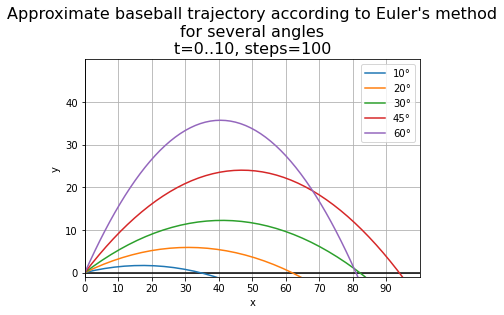

In [48]:
from my_calculus import eulers_method
from my_vectors import to_cartesian, to_radians
import matplotlib.pyplot as plt

angles=[10, 20, 30, 45, 60]

trajectories = [(angle_deg, eulers_method(s0=(0, 0), v0=(to_cartesian((30, to_radians(angle_deg)))), a=(0, -9.81), total_time=10, step_count=100)) for angle_deg in angles]


fig, ax = plt.subplots()
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

plt.title(
    'Approximate baseball trajectory according to Euler\'s method\n'
    'for several angles\n'
    't=0..10, steps=100', fontsize=16)

plt.ylim(-1, 50)
plt.xlim(0, 100)
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 50, 10))

# plotting trajectories as a scatter plots
for [angle_deg, trajectory] in trajectories:
    xs = [x for (x, _) in trajectory]
    ys = [y for (_, y) in trajectory]
    plt.plot(xs, ys, label='{}°'.format(angle_deg))

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Exercise 9.6

An object moving in 3D space has an initial velocity of $ (1, 2, 0) $ and has a constant acceleration vector of $ (0, -1, 1) $. If it starts at the origin, where is it after 10 seconds?

Plot its trajectory in 3D using the `my_draw3d` library.

Let's review our implementation of `eulers_method` to see if it will work for 3D vectors:

```python
def eulers_method(s0, v0, a, total_time, step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time / step_count
    for _ in range(0, step_count):
        s = add(s, scale(dt, v))
        v = add(v, scale(dt, a)) # v is updated for the next cycle
        trajectory.append(s)
    return trajectory
```

There's no assumption of any of the vectors to be 2D in the implementation. Therefore, we would be able to use it right away for this exercise:

In [54]:
from my_calculus import eulers_method

trajectory = eulers_method(s0=(0, 0, 0), v0=(1, 2, 0), a=(0, -1, 1), total_time=10, step_count=1000)

print('position(t=10)={}'.format(trajectory[len(trajectory) - 1]))

position(t=10)=(9.999999999999831, -29.949999999999644, 49.94999999999933)


Now, let's plot it using a 3D scatter plot in `matplotlib`:

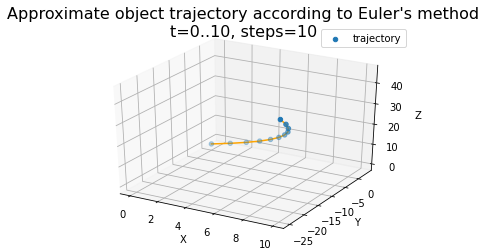

In [67]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.title(
     'Approximate object trajectory according to Euler\'s method\n'
     't=0..10, steps=10', fontsize=16)

trajectory = eulers_method(s0=(0, 0, 0), v0=(1, 2, 0), a=(0, -1, 1), total_time=10, step_count=10)
xs = [x for (x, _, _) in trajectory]
ys = [y for (_, y, _) in trajectory]
zs = [z for (_, _, z) in trajectory]
ax.plot(xs, ys, zs, color='orange')
ax.scatter(xs, ys, zs, label='trajectory')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(bbox_to_anchor=(1, 1))

plt.show()
